### Processing a demo fastq file using biopython 

### Read FASTQ file

In [2]:
from collections import defaultdict
import gzip
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from Bio import SeqIO

In [11]:
recs = SeqIO.parse(open(
    '/Users/stevennguyen/Bioinformatics/demo.fastq', 'rt',encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec)
print(rec.letter_annotations['phred_quality'])

ID: SRR960459.1
Name: SRR960459.1
Description: SRR960459.1 HWI-ST330:304:H045HADXX:1:1101:1162:2055 length=100
Number of features: 0
Per letter annotation for: phred_quality
Seq('NAGAACTTGGCGGCGAATGGGCTGACCGCTTCCTCGTGCTTTACGGTATCGCCG...GTT')
[2, 16, 28, 35, 35, 37, 37, 37, 39, 39, 39, 38, 39, 40, 41, 41, 41, 41, 40, 41, 41, 41, 38, 36, 38, 38, 32, 37, 38, 33, 39, 39, 36, 39, 38, 37, 33, 37, 37, 35, 36, 35, 36, 34, 35, 35, 32, 28, 28, 34, 33, 31, 33, 35, 35, 35, 35, 35, 30, 26, 33, 12, 27, 34, 33, 35, 35, 35, 29, 33, 33, 33, 33, 35, 35, 33, 20, 27, 31, 35, 35, 35, 34, 35, 35, 33, 31, 12, 24, 32, 34, 35, 35, 35, 35, 33, 30, 33, 27, 30]


### Distribution of nucleotides for each read

In [15]:
from Bio.SeqUtils import gc_fraction

gc_data = ((gc_fraction(rec.seq), len(rec.seq)) for rec in SeqIO.parse(open('/Users/stevennguyen/Bioinformatics/demo.fastq', 'rt',encoding='utf-8'), 'fastq'))

total_gc,total_bases = map(sum,zip(*gc_data))

print(f'Total GC content: {total_gc/total_bases:.2%}')

Total GC content: 0.48%


### Assessing quality of reads 


In [18]:
recs = SeqIO.parse(open('/Users/stevennguyen/Bioinformatics/demo.fastq', 'rt',encoding='utf-8'), 'fastq')
count_qual = defaultdict(int)
for rec in recs:
    for i, q in enumerate(rec.letter_annotations['phred_quality']):
        count_qual[q] += 1
total = sum(count_qual.values())
for qual,count in sorted(count_qual.items(),reverse=True):
    print('%d: %.2f %d' % (qual, 100. *count / total, count))

41: 15.00 18747654
40: 8.42 10523247
39: 8.99 11238087
38: 5.78 7229233
37: 8.34 10424680
36: 4.73 5907721
35: 12.34 15424007
34: 7.20 8995573
33: 4.03 5031863
32: 2.53 3163431
31: 3.64 4554799
30: 2.47 3085767
29: 1.65 2057438
28: 0.91 1133224
27: 1.15 1433761
26: 1.24 1544653
25: 0.94 1170931
24: 0.80 997686
23: 0.62 772347
22: 0.39 482610
21: 0.23 285721
20: 0.47 582242
19: 0.30 377849
18: 0.45 562633
17: 0.21 256562
16: 0.20 251271
15: 0.25 315871
14: 0.08 105355
13: 0.19 234136
12: 0.08 100494
11: 0.09 112137
10: 0.18 228732
9: 0.27 335172
8: 0.38 472091
7: 0.33 415165
6: 0.07 82512
5: 0.04 52654
2: 5.05 6310691


### Plot a histogram/boxplot to visualize 

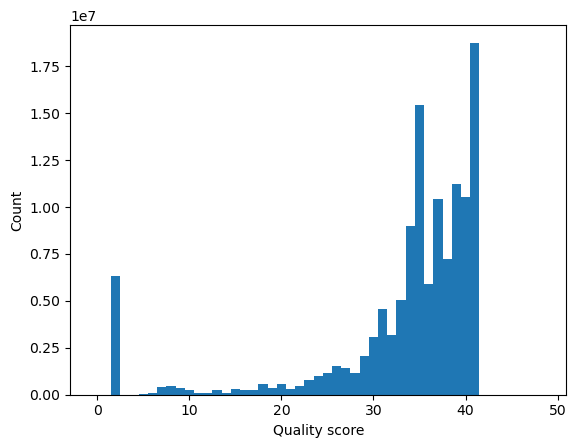

In [22]:
plt.hist(list(count_qual.keys()), weights=list(count_qual.values()), bins=range(0, 50), align='left')
plt.xlabel('Quality score')
plt.ylabel('Count')
plt.show()